# Analysis of interaction frequency and distance

In this notebook, the distributions of read pair counts per interaction and interaction distances are compared.

## Setting up the notebook

In [1]:
import sys
import os
sys.path.append("../..")
from diachr import DiachromaticInteractionSet
from diachr import IaFreqDistAnalysis

## Load interactions for analysis

First, we read an interaction file into a `DiachromaticInteractionSet`. Then we pass the `DiachromaticInteractionSet` to an object of class `IaFreqDistAnalysis`. The function `IaFreqDistAnalysis.ingest_interaction_set()` groups the interactions aaccording to chromosome, interaction category and enrichment status.

In [2]:
PROTOCOL = 'CHC'
CELL_TYPE_SHORT = 'MAC_M0'
MIN_I_DIST = '20000'
if PROTOCOL == 'CHC':
    MIN_I_DIST = '20000'
RPC_RULE = 'ht'
FDR = '05'
if PROTOCOL == 'CHC':
    INTERACTION_FILE = '../../DICer_interactions/' + RPC_RULE.upper() + '/FDR0' + FDR + '/CHC/JAV_' + CELL_TYPE_SHORT + '_RALT_20000_' + RPC_RULE + '_fdr0.' + FDR + '_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + CELL_TYPE_SHORT + '_CHC_RALT_' + MIN_I_DIST + '_' + RPC_RULE.lower()
if PROTOCOL == 'HC':
    INTERACTION_FILE = '../../DICer_interactions/' + RPC_RULE.upper() + '/FDR0' + FDR + '/HC/' + MIN_I_DIST + '/JAV_' + CELL_TYPE_SHORT + '_HC_RALT_' + MIN_I_DIST + '_' + RPC_RULE + '_fdr0.' + FDR + '_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + CELL_TYPE_SHORT + '_HC_RALT_'  + MIN_I_DIST + '_' + RPC_RULE.lower()
if PROTOCOL == 'HC_POOLED_HT':
    INTERACTION_FILE = '../../DICer_interactions/HT/FDR005/HC/20000/JAV_ALL_HC_RALL_ALT_20000_ht_fdr0.05_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + 'POOLED_HC_FDR005' + '_HC_RALT_20000_' + 'ht'
if PROTOCOL == 'HC_POOLED_ST':
    INTERACTION_FILE = '../../DICer_interactions/ST/FDR005/HC/20000/JAV_ALL_HC_RALL_ALT_20000_st_fdr0.05_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + 'POOLED_HC_FDR005' + '_HC_RALT_20000_' + 'st'

# Create DiachromaticInteractionSet
d11_interaction_set = DiachromaticInteractionSet(rpc_rule = RPC_RULE)
d11_interaction_set.parse_file(
    i_file = INTERACTION_FILE,
    verbose = True)

# Pass the DiachromaticInteractionSet to IaFreqDistAnalysis
ia_freq_dist_analysis = IaFreqDistAnalysis()
report_dict = ia_freq_dist_analysis.ingest_interaction_set(
    d11_inter_set = d11_interaction_set,
    verbose = True)

[INFO] Parsing Diachromatic interaction file ...
	[INFO] ../../DICer_interactions/HT/FDR005/CHC/JAV_MAC_M0_RALT_20000_ht_fdr0.05_evaluated_and_categorized_interactions.tsv.gz
	[INFO] Parsed 1,000,000 interaction lines ...
	[INFO] Parsed 2,000,000 interaction lines ...
	[INFO] Parsed 3,000,000 interaction lines ...
	[INFO] Parsed 4,000,000 interaction lines ...
	[INFO] Parsed 5,000,000 interaction lines ...
	[INFO] Parsed 6,000,000 interaction lines ...
	[INFO] Parsed 7,000,000 interaction lines ...
	[INFO] Parsed 8,000,000 interaction lines ...
	[INFO] Parsed 9,000,000 interaction lines ...
	[INFO] Set size: 9,648,210
[INFO] ... done.
[INFO] Reading interactions and group them according to chromosomes, interaction and enrichment category ...
	[INFO] Read 1,000,000 interactions ...
	[INFO] Read 2,000,000 interactions ...
	[INFO] Read 3,000,000 interactions ...
	[INFO] Read 4,000,000 interactions ...
	[INFO] Read 5,000,000 interactions ...
	[INFO] Read 6,000,000 interactions ...
	[INFO] 

## Organization of  interaction data

To get an overview of how the data is structured, the total numbers of interactions in the various categories can be displayed as follows:

In [3]:
print(ia_freq_dist_analysis.get_ingest_interaction_set_info_report())

[INFO] Report on ingestion of interactions:
	[INFO] Total number of interactions read: 9,648,210
	[INFO] Broken down by interaction category and enrichment status: 
		[INFO] DIX: 
			[INFO] NN: 14,701
			[INFO] EE: 54,999
			[INFO] NE: 556,116
			[INFO] EN: 561,099
		[INFO] DI: 
			[INFO] NN: 215,641
			[INFO] EE: 99,511
			[INFO] NE: 1,493,382
			[INFO] EN: 1,491,985
		[INFO] UIR: 
			[INFO] NN: 215,641
			[INFO] EE: 99,511
			[INFO] NE: 1,501,032
			[INFO] EN: 1,484,335
		[INFO] UI: 
			[INFO] NN: 611,660
			[INFO] EE: 90,152
			[INFO] NE: 583,737
			[INFO] EN: 574,708
		[INFO] ALL: 
			[INFO] NN: 1,057,643
			[INFO] EE: 344,173
			[INFO] NE: 4,134,267
			[INFO] EN: 4,112,127
[INFO] End of report.



The category `DI` contains all unbalanced interactions. The `UIR` category contains a set of balanced reference interactions that have been selected in such a way that they are comparable to unbalanced interactions in terms of interaction numbers and read pair counts per interaction. The category `DIX` contains all interactions for which no reference interaction could be selected. The category `UI` contains all other interactions that do not belong to `DIX`, `DI` or `UIR`. In addition, there is a category `ALL`, which includes interactions of all categories.

## Collection of read pair numbers and interaction distances

After the interactions have been read in and grouped, the read pair numbers and interaction distances within the various categories can be determined using the function `get_all_rp_nums_and_i_dists()`. By default, the analysis is carried out on all chromosomes, but it can also be restricted to a subset of chromosomes. The function returns two dictionaries, one for the read pair numbers per interaction and one for the interaction distances. The dictionaries are structured as the interactions are shown above. But instead of just numbers, lists of numbers are stored, i.e. one number for each interaction. In addition, the dictionaries contain information that is required for plotting.

In [4]:
rp_num_dict, i_dist_dict = ia_freq_dist_analysis.get_all_rp_nums_and_i_dists(
    #chromosomes=['chr21'],
    verbose = False
)

## 2x2 plot grids with historgrams comparable in terms of axis limits and bin size

We implemented a plot function that can be used to compare the the distributions of read pair counts per interaction or interaction distances for two interaction categories and two enrichment states.

### Total read pair counts per interaction

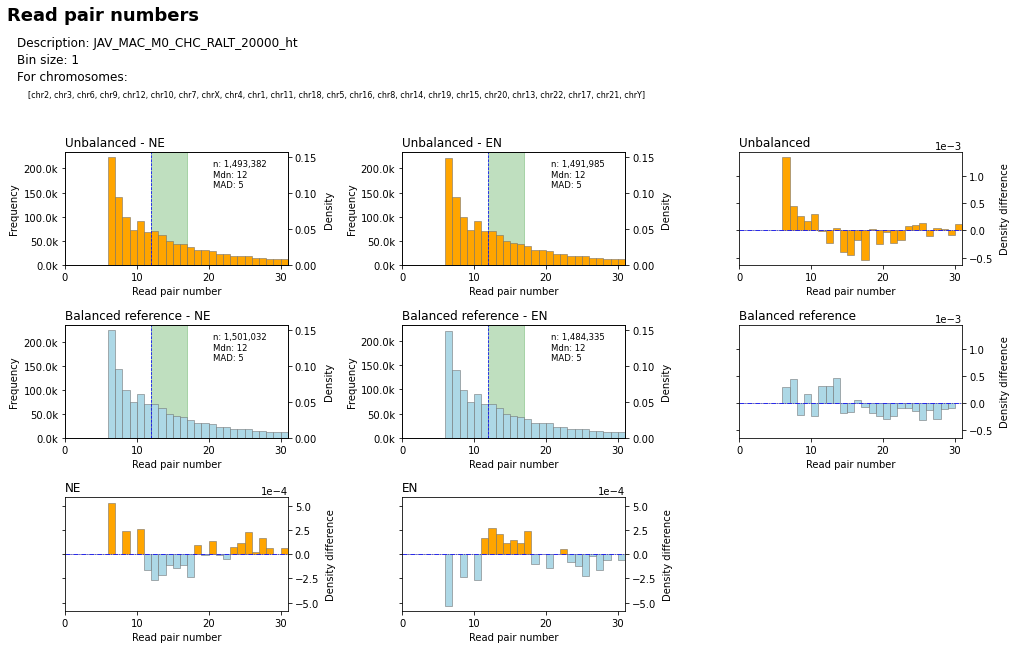

In [5]:
i_cats = ['DI', 'UIR']
e_cats = ['NE', 'EN']
q_lim = 0.85
fig = ia_freq_dist_analysis.get_all_rp_nums_or_i_dists_denisty_diff_plot(
    num_dict = rp_num_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_interaction_distance_dd_plot_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

#### Explanation of the plot

In the grid, the x-axes of all histograms are comparable, with at least `q_lim=0.85` of the data shown. Each histogram has two y-axes. The left axis shows the absolute frequencies and the right axis shows the relative frequencies or densities. All y-axes are normalized to the maximum density in the four histograms. Each histogram contains three text fields, one for the number of interactions (n), one for the median (Mdn.) and one for the median absolute deviation (MAD). In addition, a blue dashed line is drawn at the median and the width of the  range highlighted in green corresponds to the MAD. The plots of the bottom row and last column show the differences in densities for each bin.

### Interaction distances

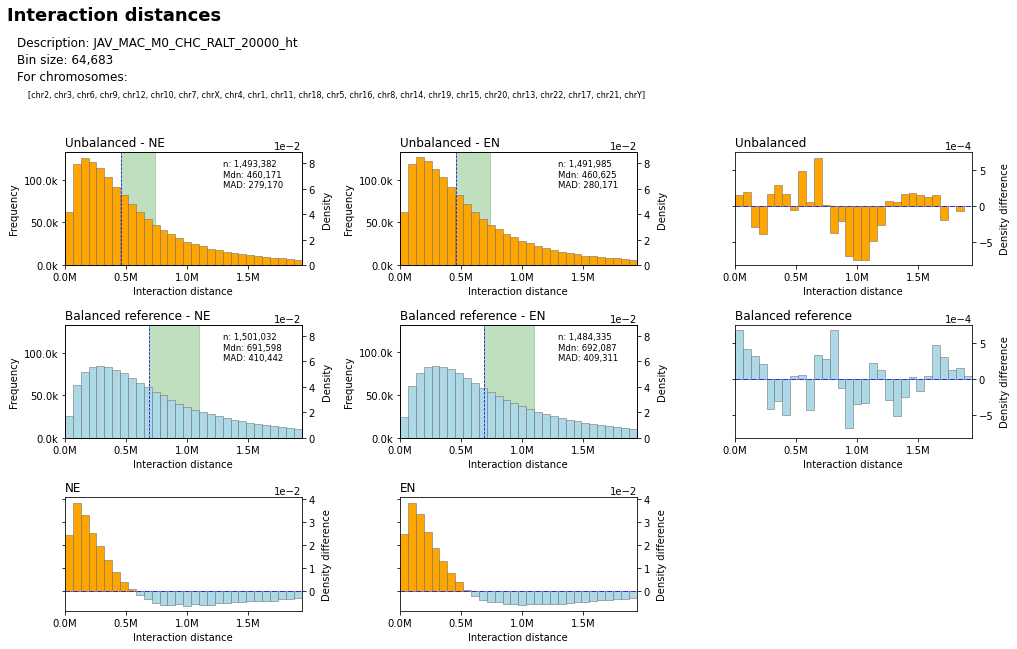

In [6]:
i_cats = ['DI', 'UIR']
e_cats = ['NE', 'EN']
q_lim = 0.85
fig = ia_freq_dist_analysis.get_all_rp_nums_or_i_dists_denisty_diff_plot(
    num_dict = i_dist_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_total_read_pair_counts_dd_plot_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

## Alternative selection of reference interactions

There is a strong dependency between interaction distance and frequency. Interaction frequency is reflected by the number of supporting read pairs per interaction. So far, for each unbalanced interaction, we have chosen a balanced reference interaction that has the same read pair count. For this selection procedure, we observed that the distribution of distances is shifted towards smaller distances for the unbalanced interactions. This suggests that frequency of unbalanced interactions, as measured by the total read pair counts, is systematically underestimated. We reasoned that the the maximum of the four read pair counts could be a more robust measure for interaction frequency. Therefore, we implemented an alternative selection procedure in which we select reference interactions accordingly.

In [7]:
# Select new reference interactions
d11_interaction_set.deselect_reference_interactions()
d11_interaction_set.select_reference_interactions(selection_rule='RPMAX')

# Pass the DiachromaticInteractionSet to IaFreqDistAnalysis
ia_freq_dist_analysis_n1 = IaFreqDistAnalysis()
report_dict = ia_freq_dist_analysis_n1.ingest_interaction_set(
    d11_inter_set = d11_interaction_set,
    verbose = False)

print(ia_freq_dist_analysis_n1.get_ingest_interaction_set_info_report())

[INFO] Report on ingestion of interactions:
	[INFO] Total number of interactions read: 9,648,210
	[INFO] Broken down by interaction category and enrichment status: 
		[INFO] DIX: 
			[INFO] NN: 46,970
			[INFO] EE: 73,515
			[INFO] NE: 894,604
			[INFO] EN: 899,699
		[INFO] DI: 
			[INFO] NN: 183,372
			[INFO] EE: 80,995
			[INFO] NE: 1,154,894
			[INFO] EN: 1,153,385
		[INFO] UIR: 
			[INFO] NN: 183,372
			[INFO] EE: 80,995
			[INFO] NE: 1,159,912
			[INFO] EN: 1,148,367
		[INFO] UI: 
			[INFO] NN: 643,929
			[INFO] EE: 108,668
			[INFO] NE: 924,857
			[INFO] EN: 910,676
		[INFO] ALL: 
			[INFO] NN: 1,057,643
			[INFO] EE: 344,173
			[INFO] NE: 4,134,267
			[INFO] EN: 4,112,127
[INFO] End of report.



In [8]:
# Collect read pair and interaction numbers
n1_rp_num_dict, n1_i_dist_dict = ia_freq_dist_analysis_n1.get_all_rp_nums_and_i_dists(
    #chromosomes=['chr21'],
    verbose = False
)

### Total read pair counts per interaction

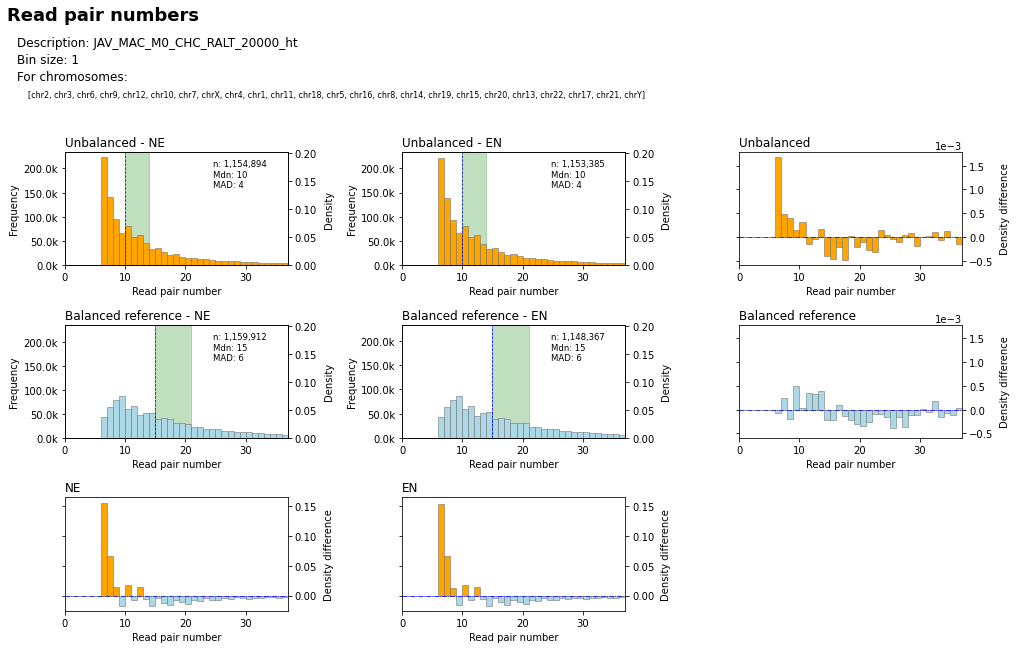

In [9]:
# Create density difference plot for DI and UIR
i_cats = ['DI', 'UIR']
e_cats = ['NE', 'EN']
q_lim = 0.85
fig = ia_freq_dist_analysis_n1.get_all_rp_nums_or_i_dists_denisty_diff_plot(
    num_dict = n1_rp_num_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_interaction_distance_dd_plot_n1_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

### Interaction distances

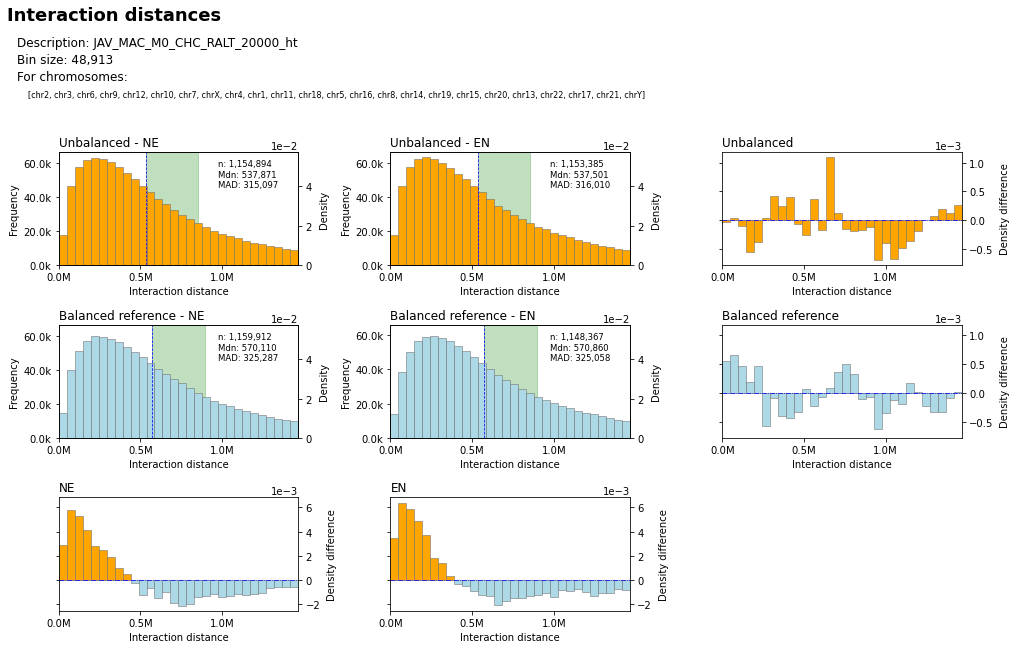

In [10]:
# Create density difference plot for DI and UIR
i_cats = ['DI', 'UIR']
e_cats = ['NE', 'EN']
q_lim = 0.85
fig = ia_freq_dist_analysis_n1.get_all_rp_nums_or_i_dists_denisty_diff_plot(
    num_dict = n1_i_dist_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_total_read_pair_counts_dd_plot_n1_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

## Writing out the results in one table row

The function `ia_freq_dist_analysis.write_num_table()` can be used to export all values that are shown in the top right of the histograms to two tab separated files, one file for read pair numbers and one file for interaction distances. We have five interaction and four enrichment categories and, for each pair, we have three values (n, Mdn. and MAD), which makes a total of 60 values. The first column contains a more detailed description of the row (`DESCRIPTION`) and the second column a short description (`DESCRIPTION_SHORT`), e.g. for the cell type, that is intended to be shown in the plots. This is followed by the 60 columns with values and a last column for the chromosomes that were taken into account for the respective row (`CHROMS`). This results in 75 columns.



```
DESCRIPTION   ...                           # MA_M1_RP_NUM_CHR21 or MA_M1_RP_NUM_CHR_ALL

DESCRIPTION_SHORT   ...                     # MA_M1

DI_NN_N   DI_NN_MED   DI_NN_MAD   ...
DI_NE_N   DI_NE_MED   DI_NE_MAD   ...
DI_EN_N   DI_EN_MED   DI_EN_MAD   ...
DI_EE_N   DI_EE_MED   DI_EE_MAD   ...

...

UI_EN_N   UI_EN_MED   UI_EN_MAD   ...
UI_EE_N   UI_EE_MED   UI_EE_MAD   ...

ALL_NN_N   ALL_NN_MED   ALL_NN_MAD   ...
ALL_NE_N   ALL_NE_MED   ALL_NE_MAD   ...
ALL_EN_N   ALL_EN_MED   ALL_EN_MAD   ...
ALL_EE_N   ALL_EE_MED   ALL_EE_MAD   ...

CHROMS                                       # ['chr21'] or ['chr21','chr22']

```

In [11]:
ia_freq_dist_analysis.write_num_table(
    out_prefix = OUT_PREFIX,
    description = OUT_PREFIX,
    verbose = True)

[INFO] Writing results about read pair numbers and interaction distances to tab separated files ...
	[INFO] Processing chromosome chr2 ...
	[INFO] Processing chromosome chr3 ...
	[INFO] Processing chromosome chr6 ...
	[INFO] Processing chromosome chr9 ...
	[INFO] Processing chromosome chr12 ...
	[INFO] Processing chromosome chr10 ...
	[INFO] Processing chromosome chr7 ...
	[INFO] Processing chromosome chrX ...
	[INFO] Processing chromosome chr4 ...
	[INFO] Processing chromosome chr1 ...
	[INFO] Processing chromosome chr11 ...
	[INFO] Processing chromosome chr18 ...
	[INFO] Processing chromosome chr5 ...
	[INFO] Processing chromosome chr16 ...
	[INFO] Processing chromosome chr8 ...
	[INFO] Processing chromosome chr14 ...
	[INFO] Processing chromosome chr19 ...
	[INFO] Processing chromosome chr15 ...
	[INFO] Processing chromosome chr20 ...
	[INFO] Processing chromosome chr13 ...
	[INFO] Processing chromosome chr22 ...
	[INFO] Processing chromosome chr17 ...
	[INFO] Processing chromosome 

## Create supplementary figures

We have implemented another function that can be used to plot comparable histograms. Two lists with any interaction interaction and enrichment categories can be passed to this function.

### Read pair numbers

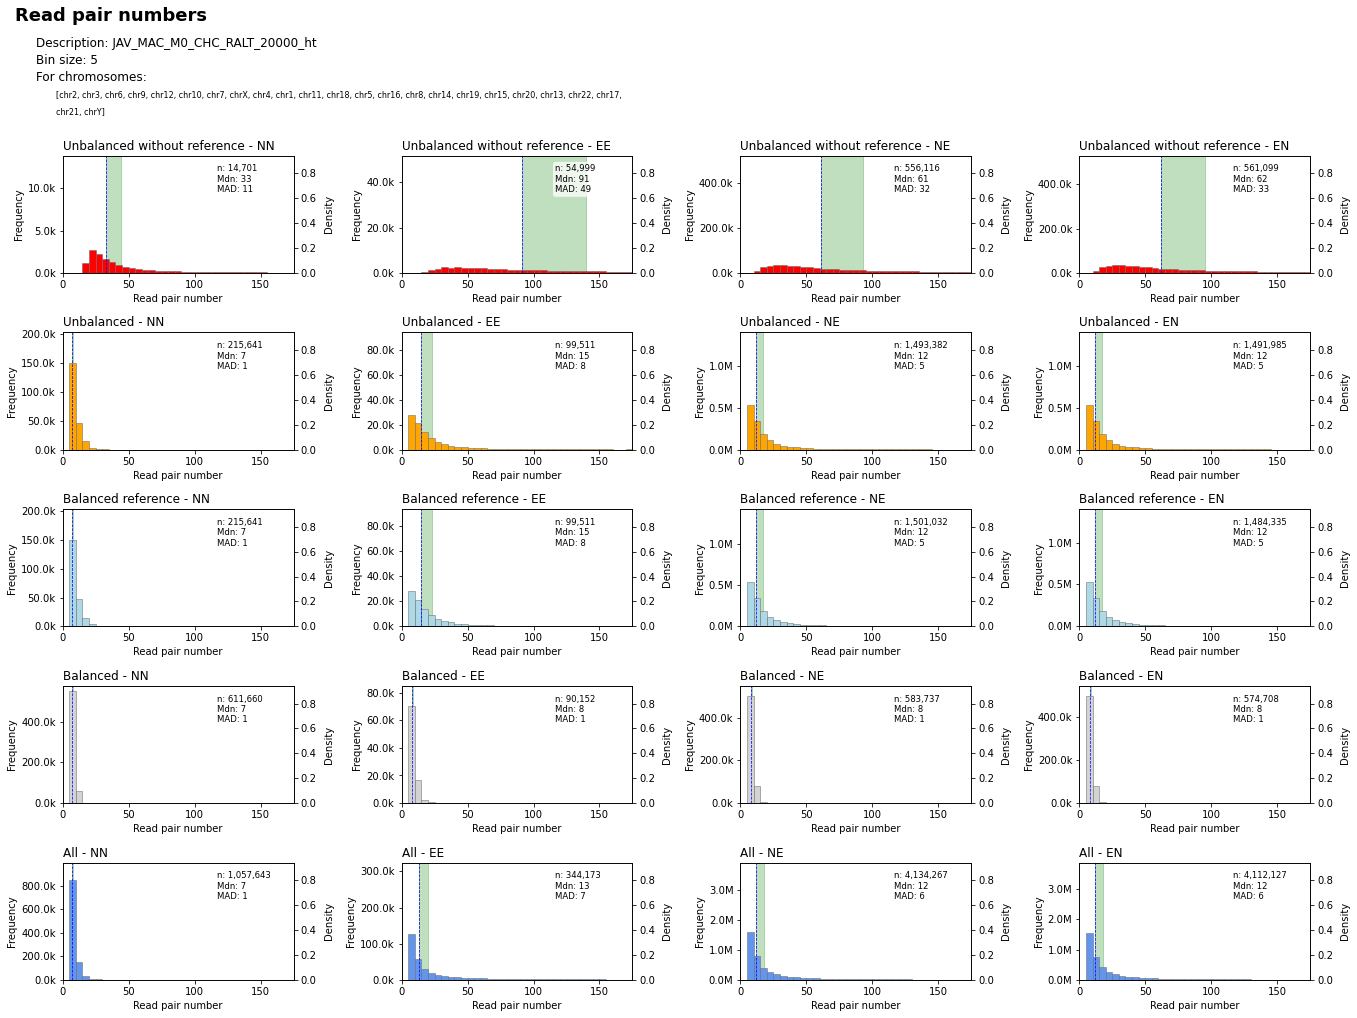

In [12]:
i_cats = ['DIX', 'DI', 'UIR', 'UI', 'ALL']
e_cats = ['NN', 'EE', 'NE', 'EN']
q_lim = 0.75
fig = ia_freq_dist_analysis.get_all_rp_nums_or_i_dists_histograms(
    num_dict = rp_num_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_rp_num_histograms_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

### Interaction distances

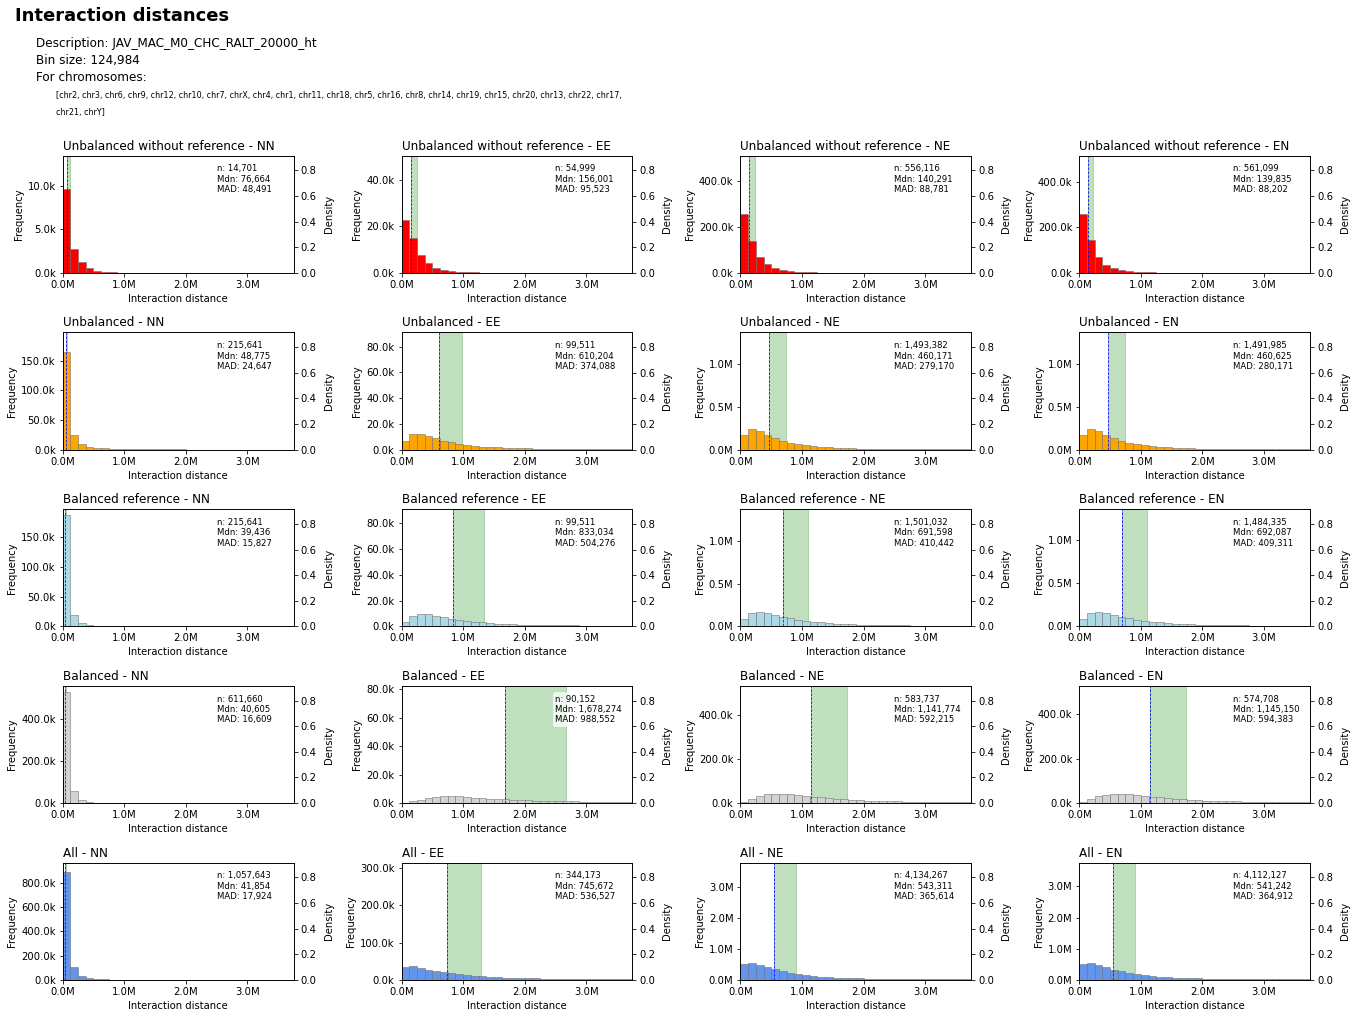

In [13]:
i_cats = ['DIX', 'DI', 'UIR', 'UI', 'ALL']
e_cats = ['NN', 'EE', 'NE', 'EN']
q_lim = 0.75
fig = ia_freq_dist_analysis.get_all_rp_nums_or_i_dists_histograms(
    num_dict = i_dist_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_i_dist_histograms_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)